## Initializing PRAW and Retrieving Reddit Data

In [66]:
# Install PRAW package for accessing Reddit API
!pip install praw

## Reddit API Wrapper Configuration

In [67]:
# Reddit API wrapper
import praw

# Set up Reddit API credentials
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="qb4A2A6dE8mX5hf8L9NW9w",
    client_secret="RVwZPIBhDOS-HxJKVs9n0R5EvbqeXA",
    user_agent=user_agent
)

## Libraries for Data Manipulation and Numerical Computing

In [68]:
# Data manipulation library
import pandas as pd

# Data manipulation library
import numpy as np

# Regular expression library for text cleaning
import re

## Reddit Submission Data Collection and Analysis

In [69]:
# Initialize an empty set to store unique submission titles
headlines = set()

# Loop through submissions in the "Beach" subreddit, fetching various attributes of each submission
for submission in reddit.subreddit("Beach").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
# Print the timestamp of when the submission was created (in UTC)
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
    
# Add the title of the submission to the set of headlines
print(len(headlines))

Hi. I'm a disabled artist who takes microscope photos looking for sand samples.
5g0480
FlyingSquid
1480637277.0
106
0.91
https://www.reddit.com/r/beach/comments/5g0480/hi_im_a_disabled_artist_who_takes_microscope/
0


## Get total comment in Subreddit

In [70]:
# Fetching data from the 'Beach' subreddit
headlines = set()
for submission in reddit.subreddit("Beach").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

948


## Data Cleaning and Preparation

In [71]:
# Create a dataframe from the scrapped data 
beach_df = pd.DataFrame(headlines)

# Display the first few rows of the DataFrame
beach_df.head()

,0
0,"Antunes beach, Alagoas, Brazil"
1,"Point Reyes National Seashore, California"
2,"Morning, relaxing sunrise at the beach. #beach..."
3,ما هي الدولة التي لديها أجمل الشواطئ؟
4,Prainhas do Pontal do Atalaia


In [72]:
# Display the column names of the DataFrame
beach_df.columns

RangeIndex(start=0, stop=1, step=1)

In [73]:
# Rename the column to 'Titles'
beach_df.columns = ['Titles']

In [74]:
# Display the first few rows of the DataFrame with the updated column name
beach_df.head()

,Titles
0,"Antunes beach, Alagoas, Brazil"
1,"Point Reyes National Seashore, California"
2,"Morning, relaxing sunrise at the beach. #beach..."
3,ما هي الدولة التي لديها أجمل الشواطئ؟
4,Prainhas do Pontal do Atalaia


In [75]:
# Count the number of duplicated titles in the 'Titles' column
beach_df.Titles.duplicated().sum() 

0

## Text Cleaning Function

In [76]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

# Cleaning the text
beach_df["Titles"]= beach_df["Titles"].apply(cleanTxt)

# Show the clean text
beach_df.head()

,Titles
0,"Antunes beach, Alagoas, Brazil"
1,"Point Reyes National Seashore, California"
2,"Morning, relaxing sunrise at the beach. beach ..."
3,ما هي الدولة التي لديها أجمل الشواطئ؟
4,Prainhas do Pontal do Atalaia


## Function to Remove Emojis and Unicode Characters

In [77]:
#vNext we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text
beach_df["Titles"]= beach_df["Titles"].apply(remove_emoji)

# Show the clean text
beach_df.head()

,Titles
0,"Antunes beach, Alagoas, Brazil"
1,"Point Reyes National Seashore, California"
2,"Morning, relaxing sunrise at the beach. beach ..."
3,ما هي الدولة التي لديها أجمل الشواطئ؟
4,Prainhas do Pontal do Atalaia


In [78]:
# Install TextBlob package for sentiment analysis
!pip install textblob

## Sentiment Analysis

In [79]:
# Import necessary libraries
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Functions for Subjectivity and Polarity Analysis

In [80]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Now we create a new column for what we just did and add it to the Tweet_df dataframe
beach_df['Subjectivity'] = beach_df['Titles'].apply(getSubjectivity)
beach_df['Polarity'] = beach_df['Titles'].apply(getPolarity)

# Now display data
beach_df.head()

,Titles,Subjectivity,Polarity
0,"Antunes beach, Alagoas, Brazil",0.0,0.0
1,"Point Reyes National Seashore, California",0.0,0.0
2,"Morning, relaxing sunrise at the beach. beach ...",0.0,0.0
3,ما هي الدولة التي لديها أجمل الشواطئ؟,0.0,0.0
4,Prainhas do Pontal do Atalaia,0.0,0.0


## Function to Categorize Polarity Scores

In [81]:
# Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Apply the getInsight function to the 'Polarity' column and store the results in a new column 'Insight'
beach_df["Insight"] = beach_df["Polarity"].apply(getInsight)

# Display the first 50 rows of the dataframe with the new 'Insight' column
beach_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"Antunes beach, Alagoas, Brazil",0.000000,0.000000,Neutral
1,"Point Reyes National Seashore, California",0.000000,0.000000,Neutral
2,"Morning, relaxing sunrise at the beach. beach ...",0.000000,0.000000,Neutral
3,ما هي الدولة التي لديها أجمل الشواطئ؟,0.000000,0.000000,Neutral
4,Prainhas do Pontal do Atalaia,0.000000,0.000000,Neutral
5,"Isla Saona Beach, Dominican Republic",0.000000,0.000000,Neutral
6,Phu Quoc chill out,0.000000,0.000000,Neutral
7,Winter Blues…,0.000000,0.000000,Neutral
8,"Japanese ""Long Lance"" at Guadalcanal beach.",0.200000,-0.025000,Negative
9,"The first egg of Easter (rock), two matching 5...",0.201667,-0.015000,Negative


## Categorizing Sentiment

In [82]:
# Import the necessary libraries
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set the plot style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

## Visualizing the Data

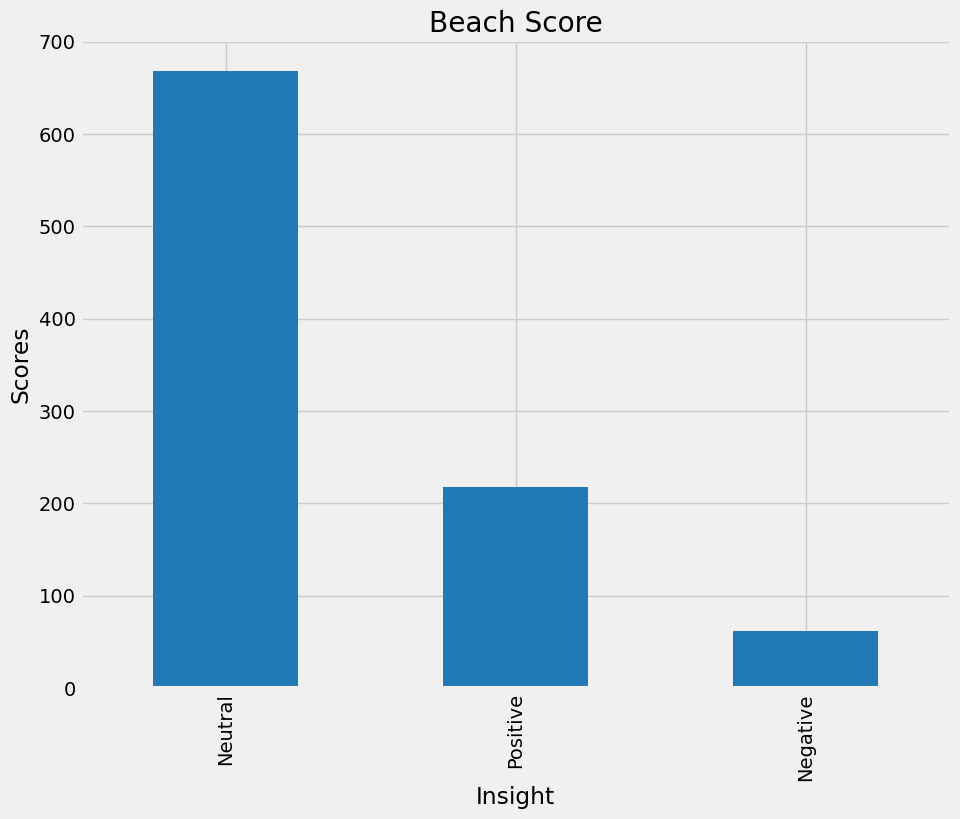

In [83]:
#Plot the values count of sentiment
plt.title("Beach Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
beach_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Wordcloud

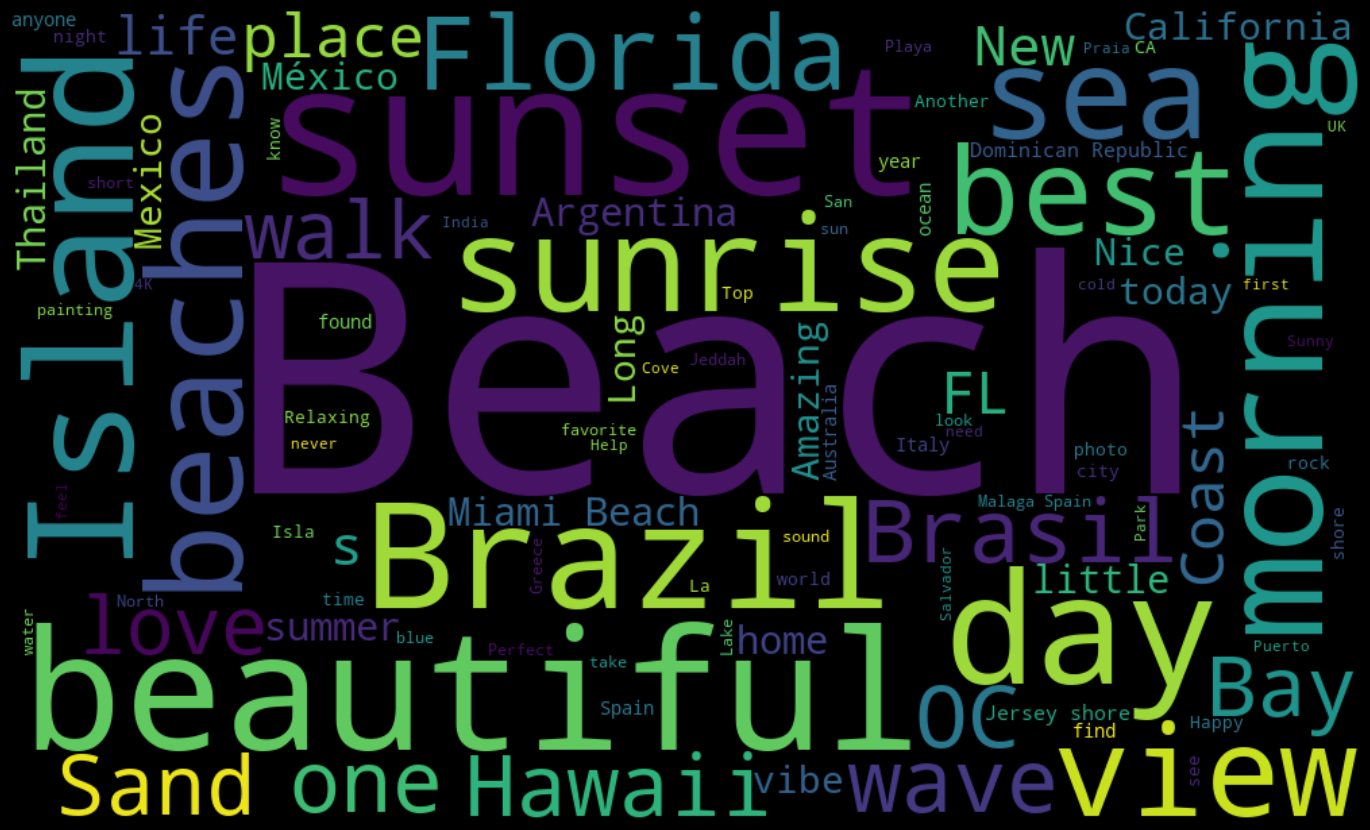

In [84]:
# Concatenate all titles into a single string
text = ' '.join( [twts for twts in beach_df['Titles']] ) #To join all tweet

# Generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");